#  Data Wrangling - We Rate Dogs

### Summary:
- #### Introduction
- #### Data Wrangling
    - Gather
    - Access
    - Clean
- #### Storing
- #### Visualizations
- #### Conclusion

### Introduction
> In this Project, I'll use Twitter data posted by `We Rate Dogs`,  a famous account on twitter which rate people's dogs. I'll Scrap some details for each tweet from twitter. Udacity providing me a neural network which predict Dogs rate. I'll scrap data using API agains this neural network and will compare how true predictions were at the end of this section. However, the core purpose of this project to master Data Wranggling Skills (gathering, Accessing, Cleaning). I'll Perform these detailed Steps in order to draw some useful insights from this data.

## Gather

In [241]:
# Load Required Libraries first

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import json
import os

import requests
import string
import tweepy

from IPython.display import Image
from IPython.core.display import HTML

%matplotlib inline


In [242]:
# Storing Image Prediction API URL, (this was provided in project discription by Udacity)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [243]:
# Read data from twitter-archive-enhanced.csvn file, This dataset is also provided by Udacity to kikstart project.
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

Now, I'll call Neural Network Image Prediction API call provided by Udacity.

In [244]:
# Create folder if it does not exist.

folder_name = 'image_predictions'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)


In [245]:
# Calling API call using Request Library.
response = requests.get(url)

In [246]:
# Create a new File and save API response into it.

with open(os.path.join(folder_name , url.split('/')[-1]) , mode='wb' ) as file:
    file.write(response.content)
# we got a new file image-predictions.tsv under image_predictions Folder. 

In [247]:
# Create a new datafeame and read and test image-predictions.tsv file.
df_predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')


In [248]:
# Select first five rows from prediction dataset.
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [249]:
# Check DataSet Details for image_predictions dataset
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


As we can see we git total `2075` Records in image_prediction dataset.

### Call Twiter API to fetch Data
> Genrally I was suppose to call Twitter API but unfortunately, I do't get my twitter developer account get approved by twitter team. By Profession I'm a Software Engineer and Writing REST APIs from years, I've Idea how to call APIs, No matter what plateform is. When I'll get my account approve, I'll practice Scrapping data from Twitter as Well. 

In [250]:
# Writing Twitter API call code for future use, Ref: http://docs.tweepy.org/en/latest/getting_started.html

# import tweepy

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)

# api = tweepy.API(auth)

# # Sample code example by twitter.
# public_tweets = api.home_timeline()
# for tweet in public_tweets:
#     print(tweet.text)

In [251]:
# Code to get Tweet by Tweet_id
# tweet_response = api.get_status(df_twitter_archive.tweet_id[1], tweet_mode='extended')

Supposing We loop throgh `df_twitter_archive.tweet_ids` and got json Object Every time. And here is code to save these responses in a file.

`tweet-json.txt` is file provided by Udacity, where they scapp all the tweets and save them into a simple text file. Now I'll read these tweets from file and continue my analysis.

In [252]:
# Check and get sample data from tweet-json.txt to see what kind of data we currently have.
with open('tweet-json.txt', encoding='utf-8') as file:
    print(file.read())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [253]:
# to append records in a loop, creating a df_list in the start of the code.

df_list = []

# reading tweet-json.txt file with utf-8 text encoding.
with open('tweet-json.txt','r', encoding='utf-8') as file:
#     file = json.load(file)
    print(type(file))
#     data_dict = json.load(file)
#     file = json.loads(file.read)
    for tweet in file.readlines():
        tweet_json = json.loads(tweet)

        #Append each Row into a List.
        df_list.append(
            {'tweet_id': tweet_json['id'],
            'retweet_count': tweet_json['retweet_count'], 
            'favorite_count': tweet_json['favorite_count'],
            'followers_count': tweet_json['user']['followers_count']
            })
        
        
# Create a new DataFrame from list of dictionaries
tweets_columns = ['tweet_id','retweet_count','favorite_count','followers_count']
df_tweets = pd.DataFrame(df_list, columns = tweets_columns)

<class '_io.TextIOWrapper'>


In [254]:
# Check our new DataFrame details.
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null int64
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [255]:
# Get first five rows from tweets_df
df_tweets.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


Now, We are done with Gathering Data Process. For now we have 3 different datasets to analyse furthermore. Let's move to Data Assess Section.

## Assess
> Now, I'll Identify Assess Data Issues and write bellow Quality/Tidiness Section (Scroll Down to see) , So that we can fix them in next Cleaning Section.

> To Implement that, I'll get every dataset and visualize it programatically and manually to find what kind of issues we have in our datasets.

We Gatherd 3 dataset in previous section, Now in current Data Assessing Sections, I'll be using these datasets.

- df_twitter_archive
- df_predictions
- tweets_df


### Twitter Archive Table

In [256]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [257]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [258]:
#count unique Items in in_reply_to_status_id columns.
df_twitter_archive['in_reply_to_status_id'].nunique()

77

In [259]:
len(df_twitter_archive['in_reply_to_status_id'])

2356

We can clearly see we have only 77 unique values in this column. 

In [260]:
df_twitter_archive['in_reply_to_user_id'].isnull().values.sum()

2278

In [261]:
df_twitter_archive['in_reply_to_user_id'].nunique()

31

In [262]:
len(df_twitter_archive['in_reply_to_user_id'])

2356

In [263]:
df_twitter_archive['in_reply_to_user_id'].unique()

array([             nan,   2.28118160e+09,   4.73844300e+07,
         3.10544075e+09,   1.64877600e+07,   7.75962000e+07,
         4.19698384e+09,   1.80670967e+08,   2.79280991e+08,
         1.94351775e+08,   1.36157220e+07,   2.19550580e+07,
         8.40547864e+17,   2.89413118e+09,   2.62595760e+07,
         3.05820820e+07,   2.06837240e+07,   1.58285381e+09,
         1.13211856e+08,   1.18563420e+07,   2.91859009e+08,
         2.91663050e+07,   7.30505014e+17,   1.58464070e+07,
         4.71729748e+09,   3.58972768e+08,   2.31910820e+09,
         2.87854860e+07,   1.19898851e+09,   4.67036706e+08,
         1.63746780e+07,   2.14356580e+07])

In [264]:
df_twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [265]:
df_twitter_archive['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [266]:
df_twitter_archive['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

As we can see most of column is not cotaining values for `in_reply_to_status_id`, `in_reply_to_user_id`

In [267]:
# Check Which Columns don't have most of data.
df_twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Twitter Archive Table

In [268]:
# Now, Check for df_predictions dataset.
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [269]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [270]:
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [271]:
df_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [272]:
df_predictions.jpg_url.nunique()

2009

In [273]:
sum(df_predictions.jpg_url.duplicated())

66

In [274]:
# Check Which Columns don't have most of data.
df_predictions.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [275]:
# Calculate missing records in Prediction table
len(df_twitter_archive) - len(df_predictions)

281

### Tweets Details Table

In [276]:
df_tweets

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
5,891087950875897856,3261,20562,3200889
6,890971913173991426,2158,12041,3200889
7,890729181411237888,16716,56848,3200889
8,890609185150312448,4429,28226,3200889
9,890240255349198849,7711,32467,3200889


In [277]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null int64
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [278]:
df_tweets.nunique()

tweet_id           2354
retweet_count      1724
favorite_count     2007
followers_count      66
dtype: int64

#### Data Inclusion :
In project description we are asked to go with following Critaria:
- Do not include retweets
- Only tweets that have images
- I'm also skipping Replies, and only go with Orignal one.


#### Quality
##### `Tweets Archive ` table
- Retweets are are found in the DataSet.
- Replies are also found in the DataSet.
- Erroneous datatypes exist in the DataSet. i-e tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper and puppo
- Missing info in expanded_urls column, only 2218 rows has data.
- Nulls represented as a string of "None" for columns:  name, doggo, floofer, pupper, puppo
- Missing values for columns : doggo, floofer, pupper, puppo
- Some names are not Seems proper names.
- Source column contans urls with Anchor tags (HTML <a href='') tags.
- rating_numerator and rating_denominator columns contains some misleading values.

##### `Predictions` table
- jpg_url is duplicated 66 times.
- 281 records are missing in prediction table.
- incorrect datatype for the column tweet_id

##### `Tweet's Details` table
- incorrect datatype for the column tweet_id

### Tidiness

#### Tweets Archive Table
- some columns are with same data like: doggo, floofer, pupper and puppo all contain dog types

#### Predictions Table
- some columns are with same data like: doggo, floofer, pupper and puppo all contain dog types

#### Tweet's Details
- This table contains totally different data from Archive and Predictions Table.


In [279]:
# Start coding here

## Cleaning Data


In [280]:
# Creating copies from original data.
df_archive_clean = df_twitter_archive.copy()
df_predictions_clean = df_predictions.copy()
df_tweets_clean = df_tweets.copy()

#### 1- Twitter Archive Data Set to be Clean.

In [281]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##### Define
- Going to drop columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` using pandas.drop() function.

##### Code


In [282]:
# Your cleaning code here
columns_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_archive_clean.drop(columns_to_drop, axis=1, inplace=True)

##### Test

In [283]:
# Your testing code here
df_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [284]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


In [285]:
df_archive_clean.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Daisy          7
Buddy          7
Toby           7
Bailey         7
an             7
Rusty          6
Dave           6
Bella          6
Leo            6
Milo           6
Stanley        6
Jack           6
Scout          6
Oscar          6
Koda           6
Jax            6
Sunny          5
            ... 
Rooney         1
Covach         1
Mimosa         1
Ivar           1
Anna           1
Corey          1
Rodman         1
DayZ           1
Stella         1
Duddles        1
Amélie         1
Linus          1
Donny          1
General        1
Hubertson      1
Oddie          1
Ralphie        1
Malikai        1
Geoff          1
Glacier        1
Chef           1
Rueben         1
Skittle        1
Augie          1
Maya           1
Chase          1
Cheryl         1
Wafer         

In [286]:
# Remove those dogs having name 'None' and 'a'

In [336]:
df_archive_clean = df_archive_clean[(df_archive_clean.name != 'None') & (df_archive_clean.name != 'a')]

It can be seen that the extra columns has been dropped. Now Data set looking pretty much short.

##### Define
- Converting `tweet_id` into Object/String using astype function in df_archive_clean dataframe.

##### Code


In [288]:
# Your cleaning code here
df_archive_clean.tweet_id = df_archive_clean.tweet_id.astype(str)


##### Test

In [289]:
# Your testing code here
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(2), object(10)
memory usage: 221.0+ KB


It can be seen that tweet_id have been converted to valid object from int.

##### Define
- Converting timestamp column to datetime object using pd.to_datetime(df)

##### Code


In [290]:
# Your cleaning code here
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

##### Test

In [291]:
# Your testing code here
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 221.0+ KB


timestamp column has been converted to datetime64 type successfully.

 **I can remove anchor tag containg href from `source` column using split the string but**

##### Define
- Remove Source column as I'll not be using it for any kind of processing.

##### Code


In [292]:
# Your cleaning code here
df_archive_clean.drop(['source'],axis=1, inplace=True)

##### Test

In [293]:
# Your testing code here
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 202.5+ KB


In [294]:
df_archive_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##### Define
Counting missing values for doggo, floofer, pupper and puppo in archive table

##### Code


In [295]:
# Your cleaning code here
dog_types = list(df_archive_clean.iloc[:,-4:])
dog_types

['doggo', 'floofer', 'pupper', 'puppo']

In [296]:
# a generic fucntion to find dogs types and Replace NaN if value not found.
def find_dog_type(df, values):
    result = []
    for row in df['text']:
        if values in row:
            result.append(values)
        else:
            result.append(np.NaN)
    return result

In [297]:
# Calling function which is defiend abouve.
for d in dog_types:
    df_archive_clean[d] = find_dog_type(df_archive_clean, d)

##### Test

In [298]:
# Your testing code here
df_archive_clean[dog_types].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
doggo      98 non-null object
floofer    4 non-null object
pupper     272 non-null object
puppo      37 non-null object
dtypes: object(4)
memory usage: 73.7+ KB


In [299]:
# Compare to counts from text
for d in dog_types:
    print(d, df_archive_clean.text.str.contains(d).sum())

print("Total counts " + str(df_archive_clean.text.nunique()))

doggo 98
floofer 4
pupper 272
puppo 37
Total counts 2356


##### Define
remove those rows where `rating_denominator` are misleading.
- find those records having icorrect denominators.
- remove those records.

##### Code


In [300]:
df_archive_clean.rating_denominator.nunique()

18

In [301]:
# Check for various types of values in denominator
df_archive_clean.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

It can be seen that, there are some others values except 10, as it was mentioned in project description that denominator value is 10 that they use. So Now, I'll remove those records which has these values.

In [302]:
print(df_archive_clean[df_archive_clean.rating_denominator != 10].rating_denominator.count())

23


We can see there are 23 records which has denominator not equal to 10. we we will remove these.

In [303]:
df_archive_clean.drop(df_archive_clean[df_archive_clean.rating_denominator != 10].index, axis=0, inplace=True)

##### Test

In [304]:
# Your testing code here
print(df_archive_clean[df_archive_clean.rating_denominator != 10].rating_denominator.count())

0


##### Define
Identify and remove rating_numerator rows which has misleading values.
- Identify using pandas.query and count method.
- use drop() method to remove these values.

##### Code


In [305]:
#Identify misleading numerators.
df_archive_clean.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,    0,   75,    7,    9,    8,    1,   27,    3,    4, 1776,
         26,    2])

Let's suppose values which are greater then 20 are misleading numerators, so I'll remove all other values.

In [306]:
print(df_archive_clean[df_archive_clean.rating_numerator > 20].rating_denominator.count())

9


It can be seen that only 9 values are misleading for us, So we will remove these rows.

In [307]:
df_archive_clean.drop(df_archive_clean[df_archive_clean.rating_numerator > 20].index, axis=0, inplace=True)

##### Test

In [308]:
# Your testing code here
print(df_archive_clean[df_archive_clean.rating_numerator > 20].rating_denominator.count())

0


In [309]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2324 non-null object
timestamp             2324 non-null datetime64[ns]
text                  2324 non-null object
expanded_urls         2272 non-null object
rating_numerator      2324 non-null int64
rating_denominator    2324 non-null int64
name                  2324 non-null object
doggo                 97 non-null object
floofer               4 non-null object
pupper                265 non-null object
puppo                 37 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 217.9+ KB


### Remove Tidiness

##### Define
Multiple columns in the Tweet archive table having same type of data.
- create a generic column naming `dog_type` and move values from doggo, floofer, pupper, puppo columns.
- remove these columns doggo, floofer, pupper, puppo using drop() method.


##### Code


In [310]:
# Your cleaning code here
df_archive_clean['dog_type'] = df_archive_clean.puppo.fillna(df_archive_clean.pupper.fillna(df_archive_clean.floofer.fillna(df_archive_clean.doggo)))

In [311]:
# We don't need these columns anymore, So I'm deleting them
df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### Test

In [312]:
# Your testing code here
df_archive_clean['dog_type'].head(20)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9     doggo
10      NaN
11      NaN
12    puppo
13      NaN
14    puppo
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
Name: dog_type, dtype: object

In [313]:
df_archive_clean['dog_type'].value_counts()

pupper     265
doggo       85
puppo       37
floofer      4
Name: dog_type, dtype: int64

In [314]:
# check whole table and it's datatypes etc
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2324 non-null object
timestamp             2324 non-null datetime64[ns]
text                  2324 non-null object
expanded_urls         2272 non-null object
rating_numerator      2324 non-null int64
rating_denominator    2324 non-null int64
name                  2324 non-null object
dog_type              391 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 163.4+ KB


In [315]:
# Display some sample data 
df_archive_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


##### Define
- add more rows for predictions, currently we have prediction, confidence and dog column for each 3 different predictions.
- use pd.wide_to_long function to convert them into the rows.
- I'll be using code from stackoverflow https://stackoverflow.com/questions/38862832/pandas-melt-several-groups-of-columns-into-multiple-target-columns-by-name

##### Code


In [316]:
# let's have a look towards the current dataset.
df_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [317]:
# Change column names
new_column_names = ['tweet_id', 'jpg_url', 'img_num', 
             'prediction_1', 'confidence_1', 'dog_1', 
             'prediction_2', 'confidence_2', 'dog_2', 
             'prediction_3', 'confidence_3', 'dog_3']
# Direct Assigning Column names.

df_predictions_clean.columns = new_column_names

In [318]:

# Convert wide to longa
df_predictions_clean = pd.wide_to_long(df_predictions_clean, 
                                    stubnames=['prediction', 'confidence', 'dog'],
                      i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_order', sep='_')\
.reset_index()

In [319]:
df_predictions_clean.head()

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


##### Test

In [320]:
# Your testing code here
df_predictions_clean.head()

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


In [321]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            6225 non-null int64
jpg_url             6225 non-null object
img_num             6225 non-null int64
prediction_order    6225 non-null int64
prediction          6225 non-null object
confidence          6225 non-null float64
dog                 6225 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 298.0+ KB


##### Define
- change tweet_id to str, prediction_order to categorical

##### Code

In [322]:
# let's have a look towards the current dataset.
df_predictions_clean.tweet_id = df_predictions_clean.tweet_id.astype("str")
df_predictions_clean.prediction_order = df_predictions_clean.prediction_order.astype("category")

##### Test

In [323]:
# Test Code here
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            6225 non-null object
jpg_url             6225 non-null object
img_num             6225 non-null int64
prediction_order    6225 non-null category
prediction          6225 non-null object
confidence          6225 non-null float64
dog                 6225 non-null bool
dtypes: bool(1), category(1), float64(1), int64(1), object(3)
memory usage: 255.5+ KB


In [324]:
df_predictions_clean

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
5,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,3,Rhodesian_ridgeback,0.072010,True
6,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461,True
7,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,2,malinois,0.138584,True
8,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,3,bloodhound,0.116197,True
9,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian_ridgeback,0.408143,True


### Saving Cleaned Data
> I'll save data as csv and into sql database as well.

In [325]:
df_archive_clean.to_csv('twitter_archive_cleaned.csv', index=False)
df_predictions_clean.to_csv('predictions_cleaned.csv', index=False)

In [390]:
# Saving Data in SQL files.
from sqlalchemy import create_engine

# Create Database name
engine = create_engine('sqlite://')



In [391]:
# Writing DataFrame to SQL Table
df_archive_clean.to_sql('twitter_archive_master', engine, index=False)

In [392]:
df_predictions_clean.to_sql('twitter_predictions_master', engine, index=False)

In [395]:
# Reading From Database to confirm that can we communicate from DB.
twitter_archive_master = pd.read_sql('SELECT * FROM twitter_predictions_master', engine)
twitter_archive_master.head()

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,1
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,1
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,1
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,1
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,1


### Analyzing, and Visualizing Data

In [326]:
df_archive_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [327]:
df_predictions_clean.head()

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


In [328]:
df_tweets_clean.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


#### 1- Check which is the most Favourite dog.

In [397]:
most_fav = df_tweets_clean.loc[df_tweets_clean['favorite_count'].idxmax()]
most_fav

tweet_id           822872901745569793
retweet_count                   48265
favorite_count                 132810
followers_count               3200894
Name: 412, dtype: int64

In [330]:
df_archive_clean[df_archive_clean.tweet_id == str(most_fav.tweet_id)]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
413,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,puppo


#### 2-  Draw Favorites Count

In [331]:
df_tweets_clean.favorite_count.describe()

count      2354.000000
mean       8080.968564
std       11814.771334
min           0.000000
25%        1415.000000
50%        3603.500000
75%       10122.250000
max      132810.000000
Name: favorite_count, dtype: float64

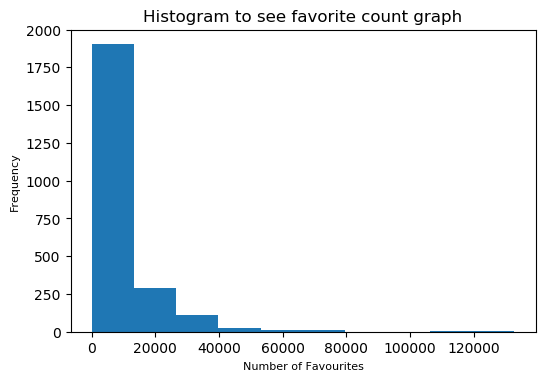

In [332]:
# setting the figure size(width, height)
plt.figure(figsize=(6,4), dpi = 100)

# labeling x-axis
plt.xlabel('Number of Favourites', fontsize = 8)
# labeling y-axis
plt.ylabel('Total Number of Dogs', fontsize = 8)
# title of a the plot
plt.title('Histogram to see favorite count graph')
df_tweets_clean.favorite_count.plot(kind='hist')


### 3- Retweet Counts and Draw a graph

In [333]:
df_tweets_clean.retweet_count.describe()

count     2354.000000
mean      3164.797366
std       5284.770364
min          0.000000
25%        624.500000
50%       1473.500000
75%       3652.000000
max      79515.000000
Name: retweet_count, dtype: float64

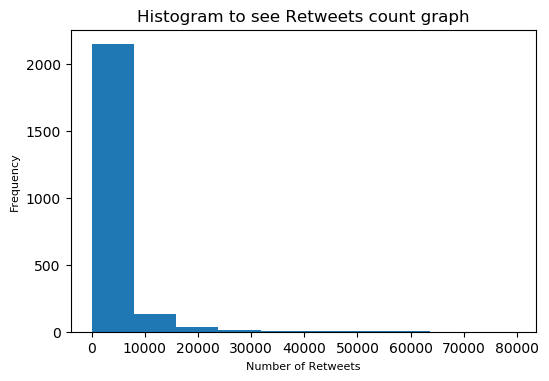

In [334]:
# setting the figure size(width, height)
plt.figure(figsize=(6,4), dpi = 100)

# labeling x-axis
plt.xlabel('Number of Retweets', fontsize = 8)
# labeling y-axis
plt.ylabel('Total Number of Dogs', fontsize = 8)
# title of a the plot
plt.title('Histogram to see Retweets count graph')
df_tweets_clean.retweet_count.plot(kind='hist')


### 4- The Most Popular Names of the dogs (Top 20)

In [346]:
df_archive_clean.name.value_counts().head(20)

Charlie    12
Cooper     11
Lucy       11
Oliver     11
Penny      10
Lola       10
Tucker     10
Bo          9
Winston     9
the         8
Sadie       8
Bailey      7
Buddy       7
Toby        7
Daisy       7
Milo        6
Jack        6
Dave        6
Jax         6
Leo         6
Name: name, dtype: int64

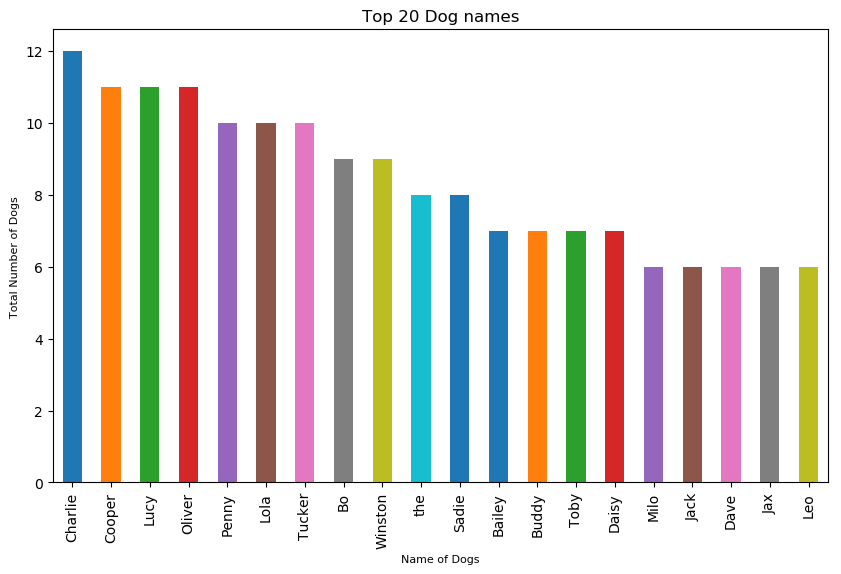

In [398]:
# setting the figure size(width, height)
plt.figure(figsize=(10,6), dpi = 100)

# labeling x-axis
plt.xlabel('Name of Dogs', fontsize = 8)
# labeling y-axis
plt.ylabel('Total Number of Dogs', fontsize = 8)
# title of a the plot
plt.title('Top 20 Dog names')
df_archive_clean.name.value_counts().head(20).plot(kind='bar')


### 5- Compare Predictions with Actual Records

In [353]:
confidence = df_predictions_clean.groupby('prediction_order')['confidence']

In [354]:
confidence.mean()


prediction_order
1    0.594548
2    0.134589
3    0.060324
Name: confidence, dtype: float64

In [355]:
confidence.median()


prediction_order
1    0.588230
2    0.118181
3    0.049444
Name: confidence, dtype: float64

In [356]:
confidence.std()

prediction_order
1    0.271174
2    0.100666
3    0.050906
Name: confidence, dtype: float64

In [357]:
confidence.mean() - confidence.std()


prediction_order
1    0.323375
2    0.033923
3    0.009418
Name: confidence, dtype: float64

In [358]:
confidence.mean() + confidence.std()


prediction_order
1    0.865722
2    0.235254
3    0.111230
Name: confidence, dtype: float64

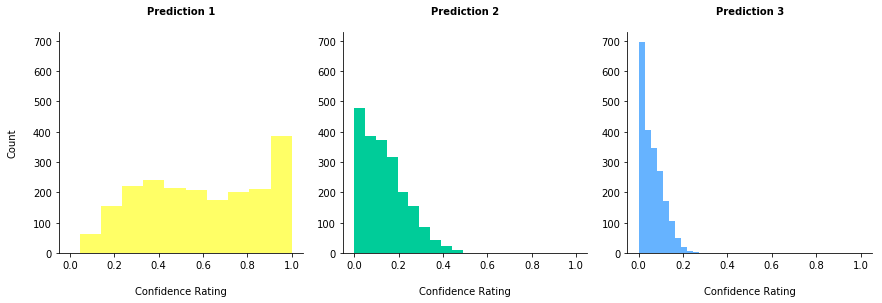

In [366]:
sns.FacetGrid(df_predictions_clean,
              col="prediction_order",
              hue="prediction_order",
              palette=['#ffff66','#00cc99', '#66b3ff'],
              size=4
             )\
    .map(plt.hist, "confidence")\
    .set_titles("Prediction {col_name}\n", weight='bold', fontsize=14)\
    .set_axis_labels("\nConfidence Rating", "Count\n");


In [367]:
# Draw some Sample Data.
samples = df_predictions_clean.query('prediction_order == 1').sample(5)
samples

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
2940,707315916783140866,https://pbs.twimg.com/media/CdDkEkHWwAAAeUJ.jpg,2,1,Bernese_mountain_dog,0.979235,True
5655,847842811428974592,https://pbs.twimg.com/media/C8QkidrVYAQXQh7.jpg,1,1,Bernese_mountain_dog,0.951337,True
5295,826598365270007810,https://pbs.twimg.com/media/C3iq0EEXUAAdBYC.jpg,1,1,French_bulldog,0.628119,True
2520,694669722378485760,https://pbs.twimg.com/media/CaP2bS8WYAAsMdx.jpg,2,1,beaver,0.457094,False
450,668641109086707712,https://pbs.twimg.com/media/CUd9ivxWUAAuXSQ.jpg,1,1,vacuum,0.432594,False


In [378]:
Image(url=samples.jpg_url.iloc[0], width=400, height=400)

In [370]:
df_predictions_clean[df_predictions_clean.tweet_id == samples.tweet_id.iloc[0]]

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
2940,707315916783140866,https://pbs.twimg.com/media/CdDkEkHWwAAAeUJ.jpg,2,1,Bernese_mountain_dog,0.979235,True
2941,707315916783140866,https://pbs.twimg.com/media/CdDkEkHWwAAAeUJ.jpg,2,2,Shetland_sheepdog,0.011037,True
2942,707315916783140866,https://pbs.twimg.com/media/CdDkEkHWwAAAeUJ.jpg,2,3,Appenzeller,0.003971,True


In [379]:
Image(url=samples.jpg_url.iloc[2], width=400, height=400)

In [376]:
df_predictions_clean[df_predictions_clean.tweet_id == samples.tweet_id.iloc[2]]

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
5295,826598365270007810,https://pbs.twimg.com/media/C3iq0EEXUAAdBYC.jpg,1,1,French_bulldog,0.628119,True
5296,826598365270007810,https://pbs.twimg.com/media/C3iq0EEXUAAdBYC.jpg,1,2,Siamese_cat,0.117397,False
5297,826598365270007810,https://pbs.twimg.com/media/C3iq0EEXUAAdBYC.jpg,1,3,cougar,0.082765,False


**With Above Images and their Prediction, We can understand how nicely, the neural network trained on Images and Predicting Results.**

### Conclusion

> Initially I got list of tweet's having some tweet's details with tweet id. I scrapped images, retweet_count, favourite_count etc from Twitter using tweepy library. I performed the detailed Data Wrangling steps, ASSESS data and found Quality and Tidy Issues. I cleaned these issue to produce better results. Last, I took a sample number of images from the original data set and compared what neural networks predict for these images to test how efficiently neural networks did this job.

##### Limitations: 
> This Analysis can be improve. I did't get my developer Account approved by Twitter team so I used tweet's details data provided by Udacity.